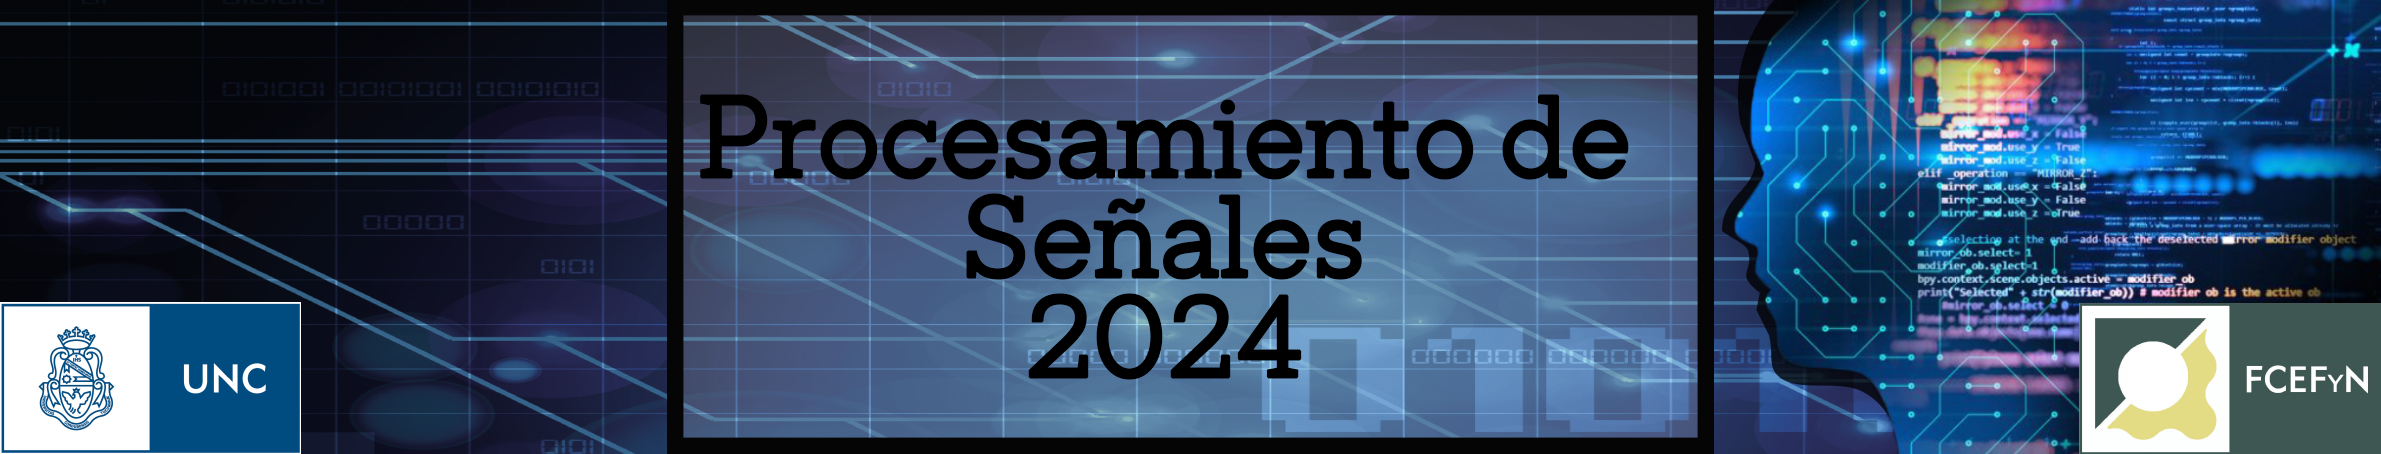

# **Laboratorio 3:**

En este laboratorio veremos:
- Matrices,
- abrir archivos de audio, acceder a las muestras de la señal y su frecuencia de muestreo
- señales no estacionarias  
- DFT.N localizada o por segmentos (inicios de STFT)
- Análisis en tiempo y frecuencia de las ventanas (Rect, Hamming, etc)



## Bonus: Frecuencia y sonido
Para "jugar" un poco

[Link Frecuencias y sonidos](https://colab.research.google.com/github/Tyler-Hilbert/AudioProcessingInPythonWorkshop/blob/master/AudioProcessingInPython.ipynb#scrollTo=oI_G5zEXPLWr)
Gentileza de la Colo Bertello

No ejecuten las celdas, sólo el play del cada sonido:

## Librerías necesarias

instalamos la librerías y sublibrerías necesarias para toda la notebook

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal #para convolución lineal
from scipy.fftpack import fft,fftshift,ifft #funciones p/trabajar con la Transf. de Fourier
from scipy.io.wavfile import read, write  #para leer, grabar archivos de audio formato wav

## Matrices con numpy (np)

La librería mas utilizada para el manejo de vectores y matrices (arreglos)


In [ ]:
#Definimos una matriz (array 2D, con filas y columnas)
mat = np.array(([1,2,3],[4,5,6],[7,8,9],[10,11,12]))
print(mat)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [ ]:
matriz_ceros = np.zeros((3,2))
print(matriz_ceros)

matriz_unos = np.ones((2,4))
print(matriz_unos)

[[0. 0.]
 [0. 0.]
 [0. 0.]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]


##### tamaño, forma/shape

In [ ]:
#tamaños, dimensiones, forma, shape
print(mat.shape, '=(#filas, #cols), shape de matriz 4x3')
print(matriz_ceros.shape,'shape de matriz 3x2')
print(matriz_unos.shape,'shape de matriz 2x4')

(4, 3) =(#filas, #cols), shape de matriz 4x3
(3, 2) shape de matriz 3x2
(2, 4) shape de matriz 2x4


In [ ]:
#accedemos a las entradas de la matriz (arreglo 2D)
#con dos índices, uno para filas y otro para columnas
#el primer índice es el de la fila y los índices comienzan en 0
print(mat) #matriz completa
print(mat[2,1]) #3era fila 2da columna,

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
8


elegimos filas y columnas

In [ ]:
print(mat)
print(mat[2,:]) #tercera fila, o fila número 2, los índices empiezan en 0
ter_fila=mat[2,:]

segcol=mat[:,1]
print(segcol)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[7 8 9]
[ 2  5  8 11]


In [ ]:
print(mat.shape)
print(ter_fila.shape)
print(segcol.shape)

(4, 3)
(3,)
(4,)


**Notar** como se baja de 2D a 1D al fijar una fila o una columna

## Ejercicio 1  

Dada la matriz A, calcular tamaño/shape de A, Quedarse con la primer columna de A y calcular shape y longitud

In [ ]:
A=np.array([[1,2,3],[4,5,6],[1,2,3],[4,5,6],[7,8,9],[10,11,12],[7,8,9],[10,11,12]])
print(A)

[[ 1  2  3]
 [ 4  5  6]
 [ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]
 [ 7  8  9]
 [10 11 12]]


In [ ]:
# extraemos todas las filas y la primera columna de A
nA = A[:,0]
print(nA)

[ 1  4  1  4  7 10  7 10]


## Archivos en Colab:
clik en el lugar indicado con rojo en próxima imagen y luego buscan y seleccionan los archivos necesarios


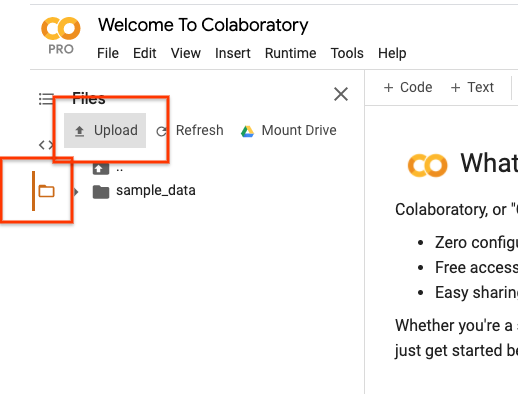

## Ejercicio 2: audio.wav
a) Escuche el archivo 'audiolab1.wav' sin reirse. ⛅ ⛱

b) Lleve a memoria los datos de la señal que se encuentra en el archivo


c) Cuál fue la frecuencia de muestreo. Cual es la frecuencia de Nyquist del muestreo. Comente

Primerop hay que Subir el archivo como indica la imagen

In [ ]:
path='./audio/audiolab1.wav' #nombre del archivo o ruta de acceso a donde esta el archivo
au1=read(path)
print (au1) #dupla

(44100, array([[  1,   1],
       [  1,   1],
       [  1,   1],
       ...,
       [  3,   3],
       [ -8,  -8],
       [-13, -13]], dtype=int16))


Notar que al abrir el archivo nos encontramos con una dupla de datos.
- En el primer lugar (au1[0]), tenemos la <mark>**frecuencia de muestreo en Hertz con que fue capturada la señal de audio**</mark>
- En segundo lugar (au1[1]) tenemos la <mark>señal en si</mark>, que según el aparato con que fue capturada la señal puede ser un vector (array 1D) o una matriz con dos columnas (sonido stereo, en general dos columnas iguales)

In [ ]:
Fr1=au1[0]
print(Fr1, 'frecuencia de muestreo de la señal')
print(Fr1//2, 'frecuencia de Nyquist de la señal')

44100 frecuencia de muestreo de la señal
22050 frecuencia de Nyquist de la señal


In [ ]:
au1[1] #señal de audio, en matriz con dos columnas en este caso

array([[  1,   1],
       [  1,   1],
       [  1,   1],
       ...,
       [  3,   3],
       [ -8,  -8],
       [-13, -13]], dtype=int16)

In [ ]:
print(au1[1].shape) #matriz de datos (vector en algunos aparatos)

(344053, 2)


In [ ]:
mat_datos=au1[1]
print (mat_datos)

[[  1   1]
 [  1   1]
 [  1   1]
 ...
 [  3   3]
 [ -8  -8]
 [-13 -13]]


vector de datos: [  1   1   1 ...   3  -8 -13]
tamaño del vector de datos: (344053,)


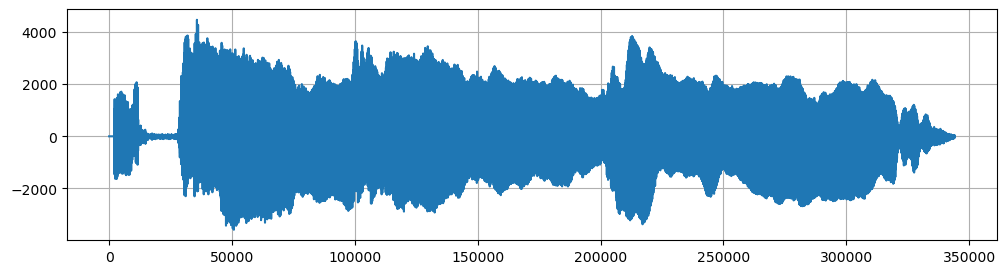

In [ ]:
A1=mat_datos[:,0] #vector de datos, arreglo numpy, elegimos la primer columna un canal
print ('vector de datos:', A1)
print ('tamaño del vector de datos:', A1.shape)

plt.figure(figsize=(12,3))
plt.plot(A1)
plt.grid()
plt.show()

### tiempos
- Calcule la cantidad de muestras que tiene la señal y el tiempo de duración
-Genere el vector de tiempos discretizados y grafique la señal en función del tiempo


In [ ]:
M=len(A1)
print('cantidad de muestras:', M)
T=M/Fr1 #tiempo de duracion de la señal (en segundos)
print('la señal dura ', M/Fr1, "segundos")#, print(T, 'segundos')

cantidad de muestras: 344053
la señal dura  7.801655328798186 segundos


344053 344053


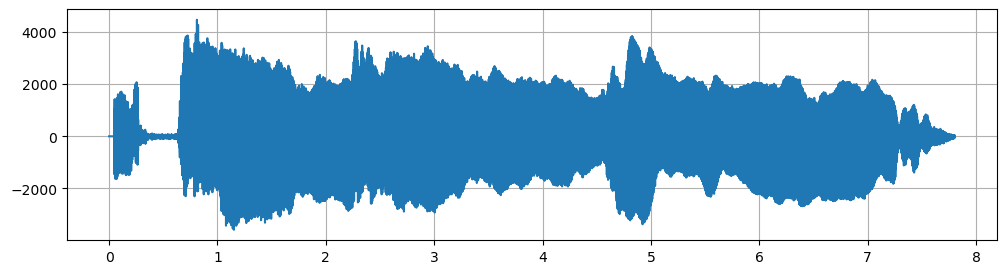

In [ ]:
Pm=1/Fr1 #periodo de muestreo en base a la fsample sacada de la tupla wav
t=np.arange(0,M/Fr1, Pm) # armamos el vector de tiempos discretizados en base a los datos obtenidos
tl=np.linspace(0,M/Fr1, M, endpoint=False) # mismo vector pero con el método linspace
#t=np.arange(0,T, Pm)
print(len(t), len(A1))

plt.figure(figsize=(12,3))
plt.plot(tl,A1)
plt.grid()
plt.show()

graficamos solo dos momentos de la señal (tipo zoom)

y agregamos el tiempo a las gráficas

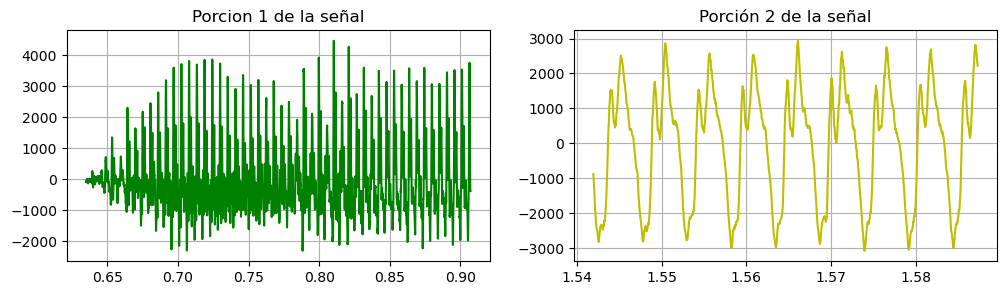

In [ ]:
plt.figure(figsize=(12,3))

plt.subplot(121)
# seleccionamos del vector de tiempos y de la señal las mismas porciones, dado que
# ambos vectores tienen la misma longitud
plt.title("Porcion 1 de la señal")
plt.plot(t[28000:40000],A1[28000:40000],c='g')
plt.grid()

plt.subplot(122)
plt.title("Porción 2 de la señal")
plt.plot(t[68000:70000],A1[68000:70000],c='y')
plt.grid()
plt.show()

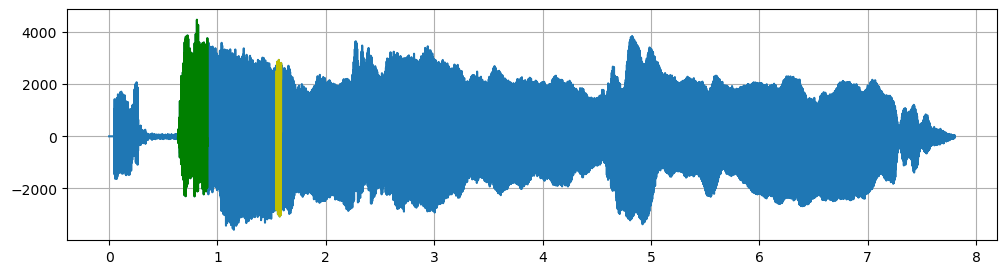

In [ ]:
# graficamos las porciones tomadas en el mismo gráfico que la señal original
plt.figure(figsize=(12,3))
# primero ponemos el plot de la señal
plt.plot(t,A1)
# luego el plot de la porción 1
plt.plot(t[28000:40000],A1[28000:40000],c='g')
# luego el plot e la porción 2
plt.plot(t[68000:70000],A1[68000:70000],c='y')
plt.grid()
plt.show()


## Ejercicio 3: DFT.N
a) Calcule su transformada de Fourier punto N, con N=M cantidad total de muestras, grafique y Analice los componentes de frecuencia. Están en Hertz?

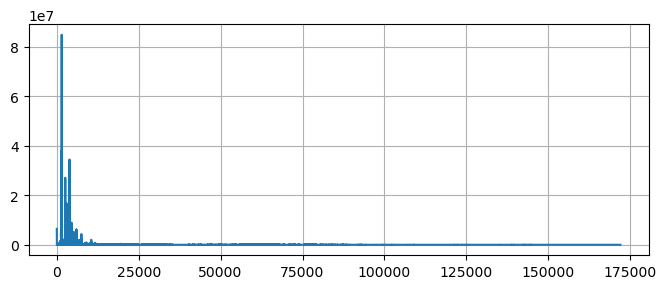

In [ ]:
N=M # la cantidad de muestras de la transformada de Fourier va a ser igual a la cantidad
    # de muestras que tiene el vector de audio del archivo wav (evitamos truncamiento/ZP)
TFA1=fft(A1,N) # hacemos la transformada
# ploteamos la transformada
plt.figure(figsize=(8,3))
plt.plot(abs(TFA1)[0:M//2]) # como se repite nos quedamos desde 0 a la mitad
plt.grid()
plt.show()

Recordar que esta tranformada está ploteada con respecto a las muestras de la transformada y no con respecto a las frecuencias en Hertz

### b) visualice la DFT.N en Hertz

Para pasar a Hz tenemos que tener en cuenta la cantidad de muestras y la longitud de la señal en segundos.

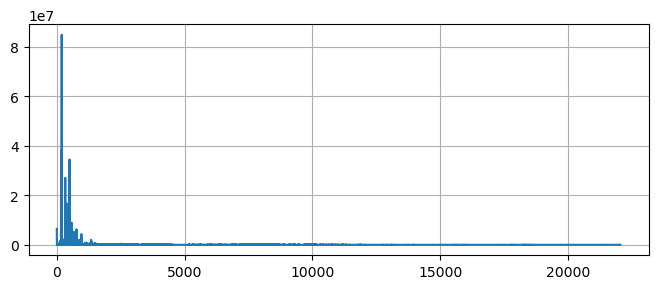

In [ ]:
fHz = np.arange(M)/T # vector de frecuencias en Hz
# verificamos que las longitudes y las dimensiones del vector frecuencias y la cantidad de muestras de la
# transformada coincidan para poder graficar
if fHz.shape != TFA1.shape:
    print("Las dimensiones no coinciden y no se podrá graficar")
else:
    plt.figure(figsize=(8,3))
    plt.plot(fHz[0:M//2], abs(TFA1)[0:M//2]) # como se repite nos quedamos desde 0 a la mitad
    plt.grid()
    plt.show()




### Vamos por partes DFT
dijo Jack...

Analicemos los componentes de frecuencia de dos momentos diferentes de la señal (de un segundo cada uno) usando DFT.N con N=Fr1

In [ ]:
# primero de define el número de muestras a analizar
N=Fr1 # N=Fr1 muestras es un segundo en este muestreo
print(f"Valor de N: {N}")
print("Largo de N:",len(A1))
#fc=np.arange(-N//2,N//2)/1 #1 seg = N=Fr1 muestras, Frec centrada en Hertz
fN=np.arange(0,N//2) # hasta la frecuencia de Nyquist en Hertz

Valor de N: 44100
Largo de N: 344053


4.535147392290249


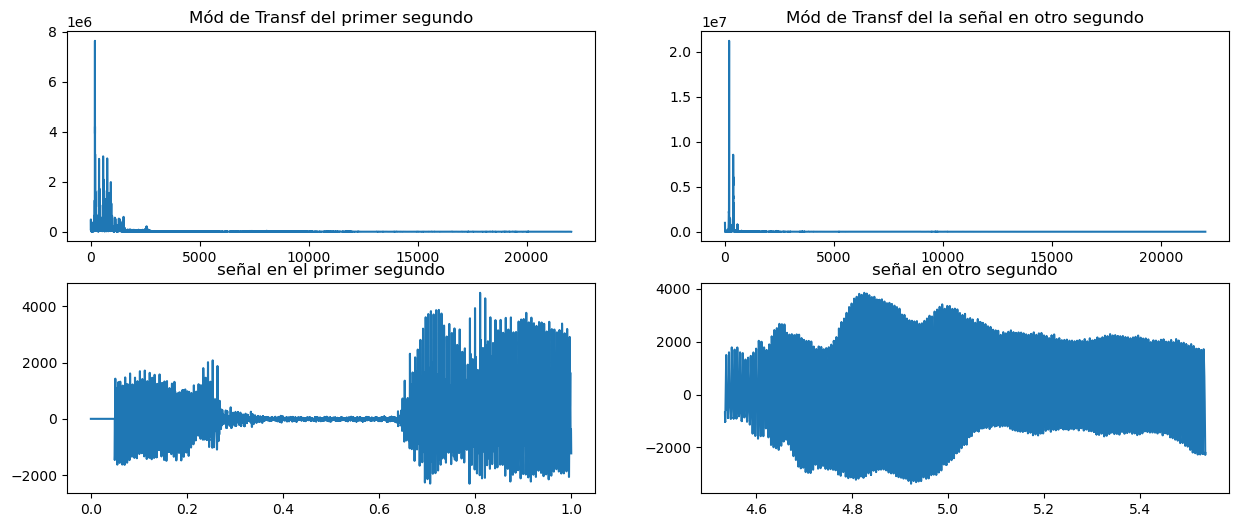

In [ ]:
DFT1=fft(A1,N) #trunca las primeras N muestras (el primer segundo de la señal)

#elegir otro momento de la señal:
inicio=200000 #en muestra muestra inicial (como mucho debe valer M-N)
t0=t[inicio] # instante de tiempo donde aparece esa muestra

#tf=t[inicio+N] # tiempo final
#t0=2 #tiempo inicial (en segundos), hay que tener cuidado con los inicios (deberia ser un multiplo de 1/Fr)
#inicio=int (t0*Fr)
#n=np.arange(inicio,(inicio+N))
DFT2=fft(A1[inicio : (inicio+N)],N) # se trunca la señal de audio de inicio a inicio+N en un segundo (N muestras = Fsample)

plt.figure(figsize=(15, 6))
plt.subplot(221)
plt.plot(fN,abs(DFT1)[0:N//2])
plt.title('Mód de Transf del primer segundo')
plt.subplot(222)
plt.plot(fN,abs(DFT2)[0:N//2])
plt.title('Mód de Transf del la señal en otro segundo')

plt.subplot(223)
plt.plot(t[0:N],A1[0:N])
plt.title('señal en el primer segundo')
plt.subplot(224)
plt.plot(t[inicio:inicio+N],A1[inicio:inicio+N])
plt.title('señal en otro segundo')
print(t0)


## Ejercicio 4
Considera que la señal anterior es estacionaria? Por que? Expláyese

> una señal estacionaria es aquella que mantiene su **frecuencia constante a lo largo del tiempo**. Las señales no estacionarias son las que cambian sus componentes frecuenciales a lo largo del tiempo.

> Luego como se trata de un audio de voz en el que se va variando el tono, entonces se entiende que es una señal no estacionaria. Aparte <mark>**podemos ver como en el gráfico anterior, para distintos instantes de tiempo, la señal en frecuencia es distinta (tiene diferentes picos)**</mark>


Dadas las señales:

$x_1(t)= 2\cos\left(18*2\pi t \right)  $

$x_2(t)= 5\cos\left(7*2\pi t \right)  $


* Sea la señal suma    
$s(t)=x_1(t)+x_2(t)$ con $ t \in [0,2)$

* Y la señal concatenada o adosada :


$c(t)=\left\{\begin{matrix}
 x_1(t) & \text{ si }  t \in [0,1) ;\\     
                   x_2(t)   & \text{ si }  t \in [1,2)
\end{matrix}\right.$

Discretizadas a 256 Hertz


512


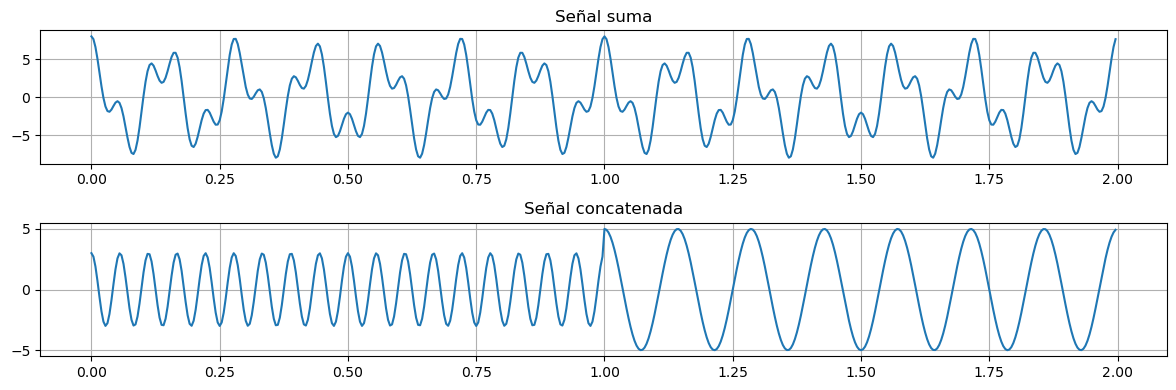

In [ ]:
# definimos la frecuencia de muestreo de las señales
Fs = 256 # muestras por segundo [Hz]

# definimos el vector temporal
t = np.linspace(0,2,2*Fs, endpoint=False) # 2*Fm = cantidad de muestras
lt = len(t)
print(lt)
# definimos las funciones base
x1=3*np.cos(36*np.pi*t)
x2=5*np.cos(14*np.pi*t)

# definimos las funciones suma y concatenación
s = x1+x2
c = np.concatenate((x1[0:256],x2[256:512]))

plt.figure(figsize=(12,4))

plt.subplot(211)
plt.plot(t,s)
plt.grid()
plt.title("Señal suma")

plt.subplot(212)
plt.plot(t,c)
plt.grid()
plt.title("Señal concatenada")

plt.tight_layout()

plt.show()

[]

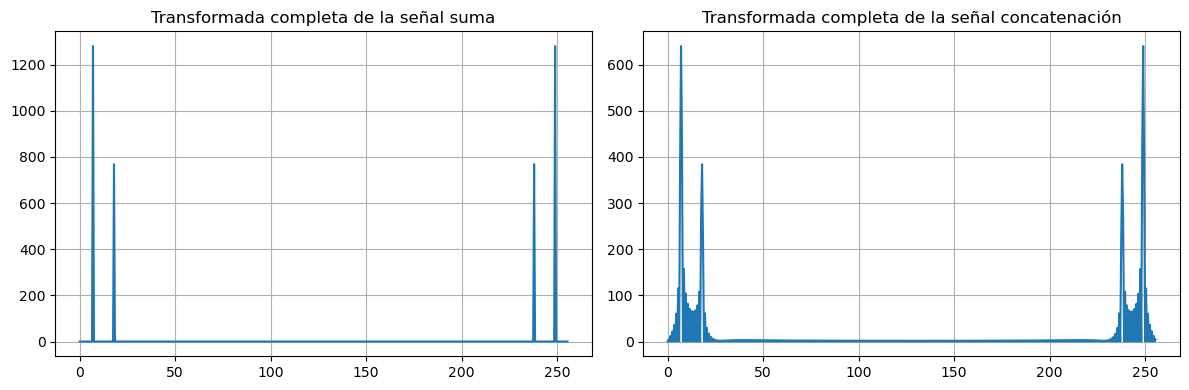

In [ ]:
N = 2 * Fs

# Calculamos las DFT con el N solicitado
TFs = fft(s,N)
TFc = fft(c,N)

# vector de frecuencias para graficar
fHz = np.arange(N)/2 # siendo 2 el tiempo en segundos de longitud del intervalo
# graficamos las transformadas
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(fHz, np.abs(TFs))
plt.title("Transformada completa de la señal suma")
plt.grid()

plt.subplot(122)
plt.plot(fHz, np.abs(TFc))
plt.title("Transformada completa de la señal concatenación")
plt.grid()

plt.tight_layout()
plt.plot()

### Ejercicio 6
Analice ambas señales según sus componenetes de frecuencia en dos momentos diferentes. Que puede decir de los resultados?

Primero analizamos a la señal suma en el primer segundo y en el segundo segundo por separado

Vemos que la señal suma es estacionaria dado que en toda la longitud temporal, la transformada de fourier es idéntica por lo que se entiende que es estacionaria.

[]

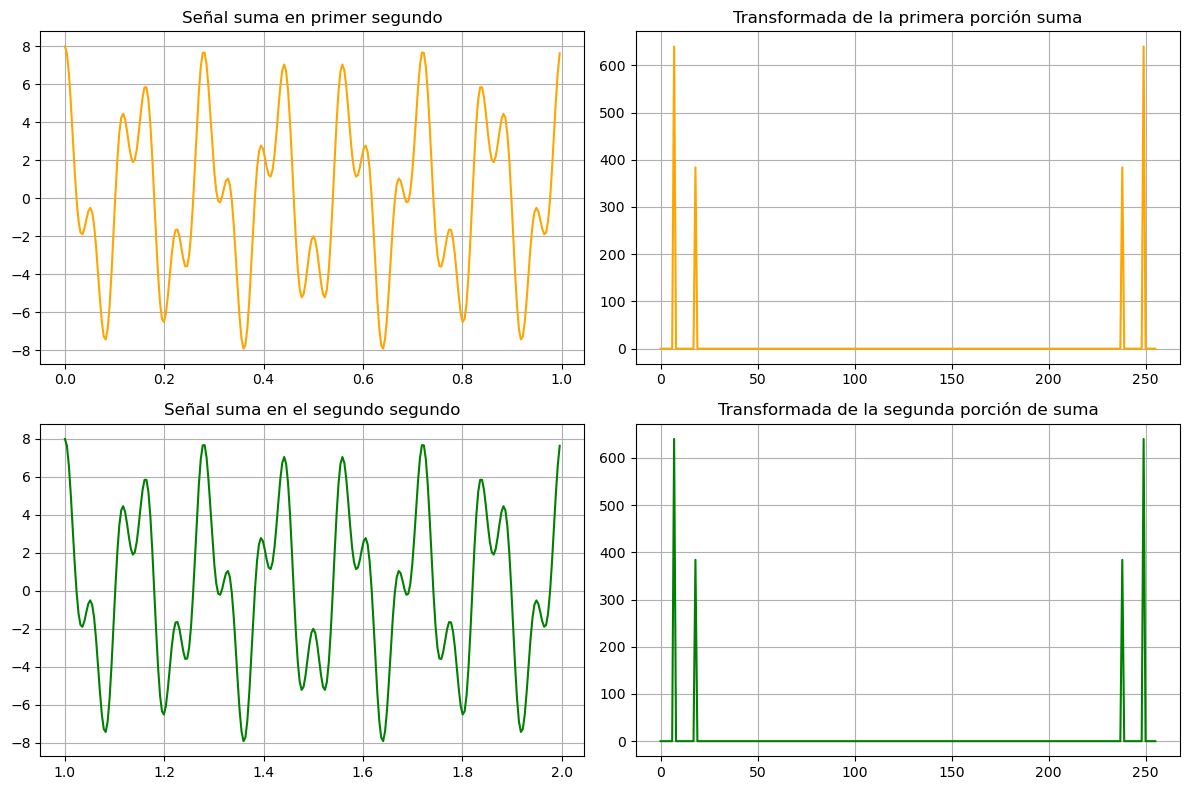

In [ ]:
# vamos a analizar a cada señal en dos instantes de tiempo separados
# Para eso difino dos vectores de tiempo separados
t1 = t[0:N//2] # vector que va de 0 a 1 segundo
t2 = t[N//2:N] # vector que va de 1 a 2 segundos

# primero analizamos la señal suma
s1=s[0:N//2] # primera mitad de la señal
s2=s[N//2:N] # segunda mitad de la señal

# ahora calculamos las transformadas para cada porción de la señal suma
TFs1 = fft(s1,N//2) # ahora las transformadas tienen la mitad
TFs2 = fft(s2,N//2) # de muestras

# defino el nuevo vector de frecuencias para graficar las transformadas
fHz = np.arange(N//2)

# graficamos las transformadas y las señales

plt.figure(figsize=(12,8))

# porcion s1 de suma
plt.subplot(221)
plt.plot(t1, s1, color='orange')
plt.title("Señal suma en primer segundo")
plt.grid()

# transformada de la primera porcion de suma
plt.subplot(222)
plt.plot(fHz, np.abs(TFs1), color='orange')
plt.title("Transformada de la primera porción suma")
plt.grid()

# porcion s2 de suma
plt.subplot(223)
plt.plot(t2, s2, color='green')
plt.title("Señal suma en el segundo segundo")
plt.grid()

# transformada de la segunda porcion de suma
plt.subplot(224)
plt.plot(fHz, np.abs(TFs2), color='green')
plt.title("Transformada de la segunda porción de suma")
plt.grid()

plt.tight_layout()
plt.plot()

Vemos que en el primer y segundo intervalo las señales son idénticas en el tiempo, además corroboramos que tienen un comportamiento frecuencial idéntico.
**Concluyo que la señal suma es estacionaria.**

Ahora voy a analizar la señal **concatenación**:

[]

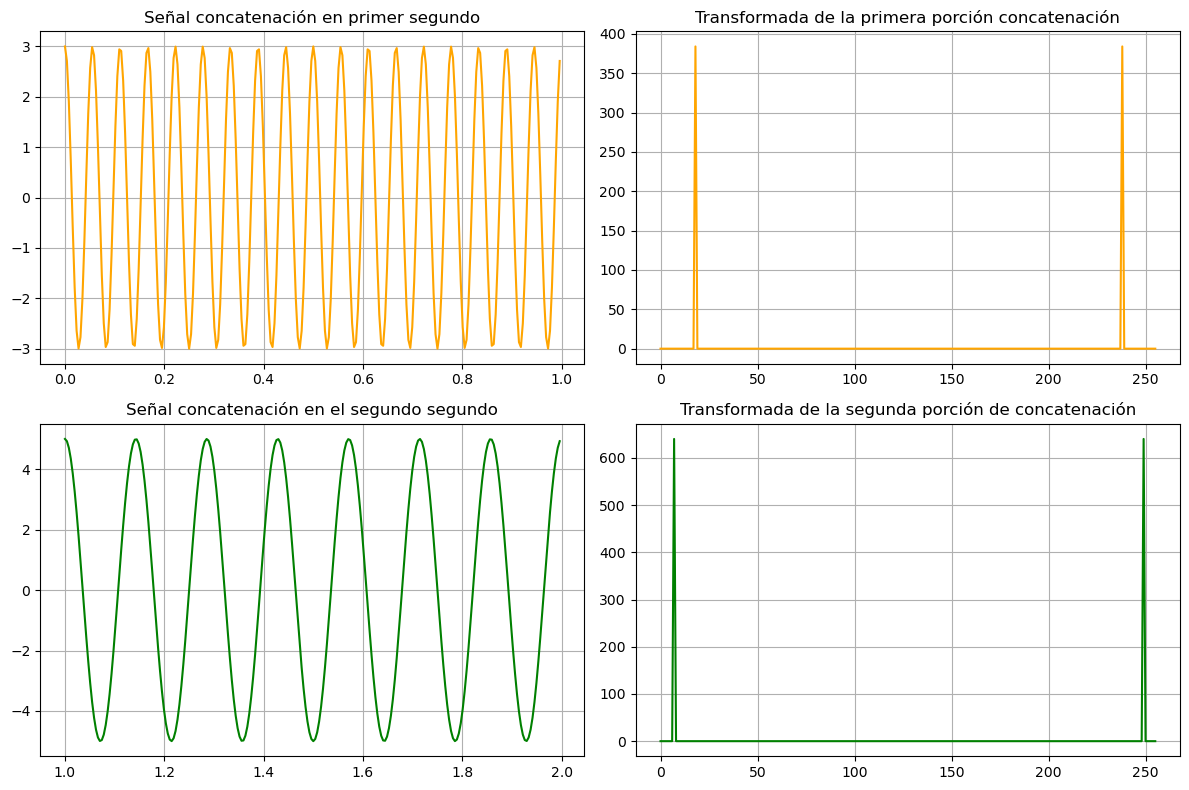

In [ ]:
# reciclamos los vectores de tiempo
# recortamos la señal concatenación
c1=c[0:N//2] # primera mitad de la señal
c2=c[N//2:N] # segunda mitad de la señal

# ahora calculamos las transformadas para cada porción de la señal concatenación
TFc1 = fft(c1,N//2) # ahora las transformadas tienen la mitad
TFc2 = fft(c2,N//2) # de muestras

# graficamos las transformadas y las señales

plt.figure(figsize=(12,8))

# porcion c1 de concatenación
plt.subplot(221)
plt.plot(t1, c1, color='orange')
plt.title("Señal concatenación en primer segundo")
plt.grid()

# transformada de la primera porcion de concatenación
plt.subplot(222)
plt.plot(fHz, np.abs(TFc1), color='orange')
plt.title("Transformada de la primera porción concatenación")
plt.grid()

# porcion c2 de concatenación
plt.subplot(223)
plt.plot(t2, c2, color='green')
plt.title("Señal concatenación en el segundo segundo")
plt.grid()

# transformada de la segunda porcion de concatenación
plt.subplot(224)
plt.plot(fHz, np.abs(TFc2), color='green')
plt.title("Transformada de la segunda porción de concatenación")
plt.grid()

plt.tight_layout()
plt.plot()

Se observa que las gráficas en el dominio temporal cambian, al igual que las gráficas en el domino temporal, que tienen picos diferentes.
**Por lo tanto, concluyo que la señal concatenación es una señal no estacionaria.**

### Pregunta
Si debemos analizar la señal en diferentes momentos y no queremos hacerlo tan artesanal... Como haria este analisis de forma mas adecuada?

**Respuesta:**

## VENTANAS (sin detenernos demasiado)

Sino llegamos a verla completa en la clase leerla de forma independiente antes de la próxima clase, preguntar en consultas.
En esta sección se estudian las propiedades de las ventanas que se utilizan para hacer el Análisis STFT (DFT Ventaneada).

Hay que considerar que las ventanas actúan en el dominio del tiempo pero al aplicarle la DFT también actúan o influyen en el dominio de la frecuencia:

- En el Ej 1 las veremos el dominio del tiempo y
- en el Ej 2 en el dominio de la frecuencia. Un buen comportamiento en el dominio de la frecuencia es que tenga ancho de banda pequeño y lóbulos laterales atenueados, eso buscaremos evaluar y comparar para las distintas ventanas.

Tema clave para las ventanas: $\Delta$ de tiempo y $\Delta$ de frecuencia están ligados por el princicio de incerteza. $\Delta t . \Delta f =cte$

**Notar que al análisis lo hacemos en muestras** (genérico, luego se adata  para cualquier frecuencia de muestreo . Definida la frec de muestreo se puede pasar todo a $\Delta t$  y  $Delta de f$ de forma proporcional e inversamente proporcional respectivamente.

### Ejercicio 1: Ventanas

Considere las ventanas rectangular, Barlett, Hamming, Parzen y Blackman  con longitudes L = 33 y 99.


In [ ]:
w1 = np.ones(33) #rectangular
w2 = signal.windows.bartlett(33)
w3=  signal.windows.hamming(33)
w4 = signal.windows.parzen(33)
w5 = signal.windows.blackman(33)

w1g = np.ones(99) #rectangular
w2g = signal.windows.bartlett(99)
w3g = signal.windows.hamming(99)
w4g = signal.windows.parzen(99)
w5g = signal.windows.blackman(99)

m = np.arange(33) #para el eje de las abscisas, vector con nros de muestras
mg = np.arange(99) #para el eje de las abscisas, vector con nros de muestras

plt.figure(figsize=(8, 4))
plt.plot(m,w2, m,w3)
plt.plot(mg,w1g,mg,w2g, mg,w3g, mg,w4g,mg, w5g)
plt.legend(('bartlett33','hamming33','rect99','bartlett99','hamming99','parzen99', 'blackman99'))
plt.show()

### Ejercicio 2: análisis en frec vent

a) Calcule p/c/u su transformada de Fourier punto N=256 y represente su módulo en dB.

Compare resultados de distintas ventanas de la misma longitud. Incluya varias
representaciones en el mismo gráfico. Qué comentarios puede hacer?

In [ ]:
#Calculamos la transformada de Fourier punto N de cada ventana de long 33, y luego solo las centramos
#para ubicar los resultados de las frecuencias bajas en el centro
N=512
W1=fft(w1,N) # transformada, señal compleja
W2=fft(w2,N)
W3=fft(w3,N)
W4=fft(w4,N)
W5=fft(w5,N)

W1c=fftshift(W1) #fftshift solo centra,
W2c=fftshift(W2)
W3c=fftshift(W3)
W4c=fftshift(W4)
W5c=fftshift(W5)

In [ ]:
#Calculamos la transformada de Fourier punto N de cada ventana de long 99, y luego solo las centramos
N=512
W1g=fft(w1g,N) # transformada, señal compleja
W2g=fft(w2g,N)
W3g=fft(w3g,N)
W4g=fft(w4g,N)
W5g=fft(w5g,N)

W1gc=fftshift(W1g) #fftshift solo centra,
W2gc=fftshift(W2g)
W3gc=fftshift(W3g)
W4gc=fftshift(W4g)
W5gc=fftshift(W5g)

In [ ]:
#Vectores de frecuencias, para
k=np.arange(0,N) #frec fundamentales de la DFT, de 0 a N-1, en [0,N), #k ocilaciones en N muestras, con k de 0 a N-1
kc=np.arange(-N/2,N/2) # ahora centrada, para cuando se usa fftshift para la transformada

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(kc,abs(W1c),kc,abs(W2c),kc,abs(W3c),kc,abs(W4c),kc,abs(W5c))
plt.legend(('TFrect33','TFbartlett33','TFhamming33','TFparzen33', 'blackman33'))
plt.subplot(122)
#completar con longitud 99
plt.show()

b) Compare resultados de la misma ventana para las dos longitudes. Incluya los dos resultados en el mismo gráfico. Qué comentarios puede hacer?

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(kc,abs(W1c),kc,abs(W1gc))
plt.legend(('TFrect33','TFrect99'))
plt.subplot(122)
#completar con transf de ventanas Hamming
plt.show()

### c) ancho de banda a 3 dB
para cada una Calcule el ancho de banda a 3 dB.
Compare los resultados para los distintos tipos de ventana y sus distintas longitudes.

In [ ]:
#Primero calculamos el módulo en dB de cada ventana.
W1dB=20*np.log10(1+abs(W1c))
W2dB=20*np.log10(1+abs(W2c))
W3dB=20*np.log10(1+abs(W3c))
W4dB=20*np.log10(1+abs(W4c))
W5dB=20*np.log10(1+abs(W5c))

W1gdB=20*np.log10(1+abs(W1gc))
W2gdB=20*np.log10(1+abs(W2gc))
W3gdB=20*np.log10(1+abs(W3gc))
W4gdB=20*np.log10(1+abs(W4gc))
W5gdB=20*np.log10(1+abs(W5gc))

In [ ]:
#caida en dB gráficamente para  la ventana rectangular long 33:
m3dBr=(np.max(W1dB)-3)*np.ones(512)
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(kc,W1dB,'b',kc,m3dBr,'black')
plt.legend(('TFrect33 en dB','caída a 3dB'))

W1N=abs(W1c/np.max(W1c)) #transformada(centrada)de rect, ahora normalizada,
W3N=abs(W3c/np.max(W3c)) #transformada(centrada) de Hamming, ahora normalizada,
#el máximo pasa a ser 1 y la caida a 3 decibeles a 0,707, para ambos
m3dBn=(0.707)*np.ones(512)
plt.subplot(122)
plt.plot(kc,W1N,'b',kc,W3N,'r', kc,m3dBn,'g')
plt.legend(('TFrect33 normaliz','TFHammig33 normaliz','caída a 3dB:0.707'))


plt.show()
print('máx en dB de rect:', np.max(W1dB))
print('máx en dB de rect-3dB:', np.max(W1dB)-3)

Para todas las normalizadas:
El máximo pasa a ser 1 y la caida a 3 decibeles a 0,707 (para todas)

In [ ]:
#Cálculo
#1ero se normaliza las transformadas (sin pasar a decibeles)
#Ventana rectangular: W1N=abs(W1c/np.max(W1c)) #transformada(centrada), ahora normalizada,
#el máximo pasa a ser 1 y la caida a 3 decibeles a 0,707
lugares1= (W1N>0.707) #vector, vale 1 donde se cumple la desig y 0 en el resto
print(sum(W1N>0.707), 'es la cant de muestras donde supera la caida a 3dB la rect')
lugares3= (W3N>0.707) #vector, vale 1 donde se cumple la desig y 0 en el resto
print(sum(W3N>0.707), 'es la cant de muestras donde supera la caida a 3dB la Hamming')

plt.figure(figsize=(12, 3))
plt.subplot(121)
plt.stem(kc,lugares1)
plt.title('vector con 1 en los lugares que supera la caida en 3dB')

plt.subplot(122)
plt.plot(kc,lugares1*W1N,'b',kc,lugares3*W3N,'r',kc,m3dBn,'g')
plt.show()

### c1) ancho de banda
 Ancho de Banda (en frec) para rect y Hamming 33

In [ ]:
deltaf1=sum(W1N>0.707)/N #ancho de banda en frec: Delta de f para rectangular 33
#deltaw1=deltaf1*2*np.pi #ancho de banda Delta de omega

deltaf3=sum(W3N>0.707)/N #ancho de banda en frec: Delta de f para Hamming 33
#deltaw3=deltaf3*2*np.pi #ancho de banda Delta de omega

print('ancho de banda de rectangular 33 es',deltaf1 )
print('ancho de banda de Hamming 33 es',deltaf3 )

### c2) ancho de banda
 Calculara Ancho de banda (en frec) para rect y Hamming 99.
 Compararlo con item anterior

In [ ]:
W1gN=abs(W1gc/np.max(W1gc)) #transformada(centrada)de rect 99, ahora normalizada,
W3gN=abs(W3gc/np.max(W3gc)) #transformada(centrada) de Hamming 99, ahora normalizada,

### d) altura máx de lóbulos laterales
para cada una Determine la altura máxima de los lóbulos laterales. Esto está relacionado con el Efecto derrame
Compare los resultados para los distintos tipos de ventana y sus distintas longitudes.

In [ ]:
plt.figure(figsize=(6, 3))
plt.plot(kc,abs(W1c))#Trasnformada de Rectangular 33, centrada
plt.show()

In [ ]:
picosw1=signal.find_peaks(abs(W1c))
print(picosw1)

In [ ]:
lugares_picosw1 = picosw1[0]
altura_de_los_picos=abs(W1c[lugares_picosw1])
print(altura_de_los_picos)

In [ ]:
plt.figure(figsize=(6, 3))
plt.plot(abs(W1c))#Transformada de Rectangular 33
plt.stem(lugares_picosw1,altura_de_los_picos, 'r')
plt.show()

In [ ]:
#sort ordena de manera ascendente
picordw1= np.sort(abs(W1c[lugares_picosw1])) #alturas ordenadas
print(picordw1)

In [ ]:
#como queremos la altura máxima de los picos laterales
AMLLrect33=picordw1[-2]
print(AMLLrect33)

## Ejercicio (para la casa)
Lleve a memoria la señal que se encuentra en el archivo 'audio2.wav' (notar que la señal tiene un solo canal) y analizarla usando DFT y DFT por partes

También puede hacerlo con el archivo 'audiolab2.wav' o con el que quieran grabar y guardar en formato wav)
